In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"C:\Users\Raghavendra N\OneDrive\Official\Datasets\ML Datasets\Marketing_train.csv")
data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [ ]:
data.shape

(7414, 22)

In [ ]:
data.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7353 non-null   object 
 2   marital         7406 non-null   object 
 3   schooling       5028 non-null   object 
 4   default         5982 non-null   object 
 5   housing         7246 non-null   object 
 6   loan            7246 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

## Data Cleaning

In [ ]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' nan 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced' nan]

schooling: 
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 [nan 'no' 'yes']

housing: 
 ['no' 'yes' nan]

loan: 
 ['no' 'yes' nan]

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



In [ ]:
#Checking the total missing values present in each feature of the data
data.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [ ]:
data.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


## Outlier analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='custAge'>

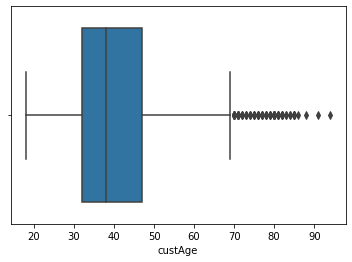

In [ ]:
sns.boxplot(data.custAge)

### Outliers exist in the variable custAge. Also median age of the customers in the dataset in 40. Majority of the customers in the dataset lie in the agegroup of 35+ years to 45 years

In [ ]:
q1 = data['custAge'].quantile(0.25)
q3 = data['custAge'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
lw, uw

(9.5, 69.5)

In [ ]:
age_outliers = data[(data['custAge'] < lw) | (data['custAge'] > uw)]
len(age_outliers)

80

##  Missing value treatment

In [ ]:
data.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [ ]:
#!pip install missingno

In [ ]:
import missingno as msn

<AxesSubplot:>

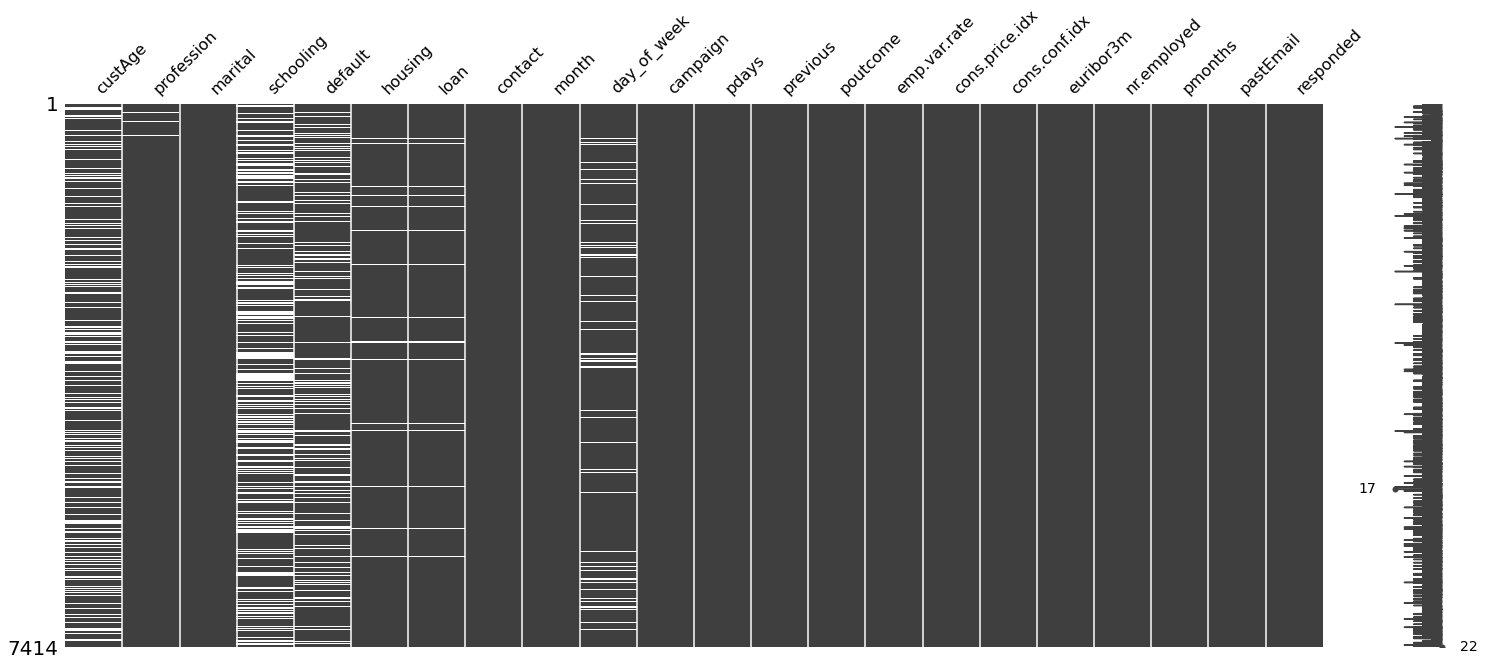

In [ ]:
msn.matrix(data)

In [ ]:
# Median Imputation Missing Values for custAge since the column has outliers
data["custAge"] = data["custAge"].fillna(data["custAge"].median())

In [ ]:
# Mode Imputation of Missing Values for Categorical Variables
data["schooling"] = data["schooling"].fillna(data["schooling"].mode()[0])
data["day_of_week"] = data["day_of_week"].fillna(data["day_of_week"].mode()[0])
data["default"] = data["default"].fillna(data["default"].mode()[0])
data["loan"] = data["loan"].fillna(data["loan"].mode()[0])
data["profession"] = data["profession"].fillna(data["profession"].mode()[0])
data["housing"] = data["housing"].fillna(data["housing"].mode()[0])
data["marital"] = data["marital"].fillna(data["marital"].mode()[0])

In [ ]:
data.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [ ]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 ['no' 'yes']

housing: 
 ['no' 'yes']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



## univariate analysis

In [ ]:
data['responded'].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [ ]:
#Checking the distribution of target variable in terms of percentage
data['responded'].value_counts(normalize=True)

no     0.886701
yes    0.113299
Name: responded, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='responded', ylabel='count'>

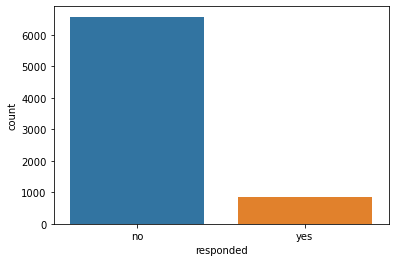

In [ ]:
sns.countplot(data['responded'])

In [ ]:
#Checking the distribution of profession column
data['profession'].value_counts(normalize=True)

admin.           0.262476
blue-collar      0.224575
technician       0.163475
services         0.096979
management       0.072296
retired          0.041408
entrepreneur     0.037092
self-employed    0.033450
housemaid        0.025223
unemployed       0.023334
student          0.019692
Name: profession, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

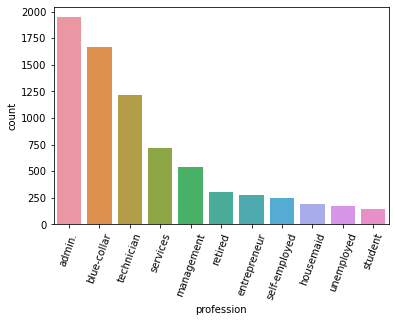

<Figure size 720x360 with 0 Axes>

In [ ]:
chart = sns.countplot(data['profession'], order = data['profession'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [ ]:
def profession_category(profession):
    if profession in ('admin.','blue-collar','technician','services','management','entrepreneur','self-employed','housemaid'):
        return 'working'
    else:
        return 'non-working'

In [ ]:
data['profession'] = data.profession.apply(profession_category)

In [ ]:
data['profession'].value_counts(normalize=True)

working        0.915565
non-working    0.084435
Name: profession, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

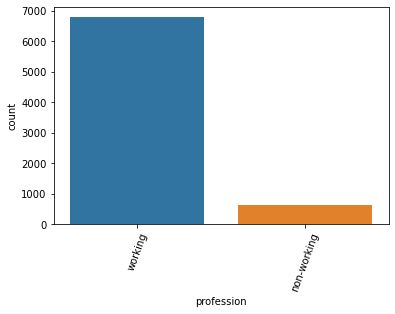

<Figure size 720x360 with 0 Axes>

In [ ]:
chart = sns.countplot(data['profession'], order = data['profession'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

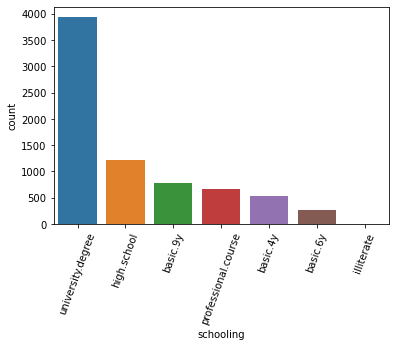

<Figure size 720x360 with 0 Axes>

In [ ]:
chart = sns.countplot(data['schooling'],order = data['schooling'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

In [ ]:
data.schooling.value_counts()

university.degree      3940
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
illiterate                1
Name: schooling, dtype: int64

In [ ]:
def schooling_category(school):
    if school in ('basic.9y','basic.4y','basic.6y'):
        return 'basic.school'
    else:
        return school

In [ ]:
data['schooling'] = data.schooling.apply(schooling_category)

In [ ]:
data.schooling.value_counts()

university.degree      3940
basic.school           1593
high.school            1216
professional.course     664
illiterate                1
Name: schooling, dtype: int64

In [ ]:
data = data[data.schooling!='illiterate']

In [ ]:
data.shape

(7413, 22)

In [ ]:
data.month.value_counts()

may    2529
jul    1229
aug    1112
jun     939
nov     740
apr     487
oct     145
sep     112
mar      93
dec      27
Name: month, dtype: int64

In [ ]:
def return_quarter(m):
    if m in ('apr','may','jun'):
        return 'Q1'
    elif m in ('jul','aug','sep'):
        return 'Q2'
    elif m in ('oct','nov','dec'):
        return 'Q3'
    else:
        return 'Q4'
data['quarter'] = data.month.apply(return_quarter)

In [ ]:
data['quarter'].value_counts()

Q1    3955
Q2    2453
Q3     912
Q4      93
Name: quarter, dtype: int64

In [ ]:
data.drop(columns='month',axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

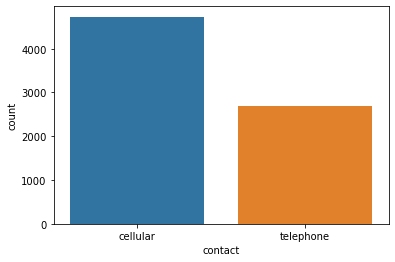

<Figure size 720x360 with 0 Axes>

In [ ]:
chart = sns.countplot(data['contact'],order = data['contact'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=0)
plt.figure(figsize=(10,5))

In [ ]:
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['working' 'non-working']

marital: 
 ['single' 'married' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'basic.school' 'professional.course']

default: 
 ['no' 'yes']

housing: 
 ['no' 'yes']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']

quarter: 
 ['Q3' 'Q2' 'Q1' 'Q4']



# Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='contact'>

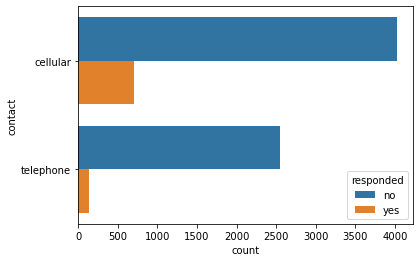

In [ ]:
#Checking how many responded when the contact was celluar(mobile phone)
sns.countplot(y=data.contact,hue=data.responded)

In [ ]:
data.contact.value_counts(normalize=True)*100

cellular     63.806826
telephone    36.193174
Name: contact, dtype: float64

### Customers responded to campaign more when the contact was through mobile phone. Today more people tend to have mobile phones than landlines

In [ ]:
#checking how loan is affecting the target

<AxesSubplot:xlabel='count', ylabel='loan'>

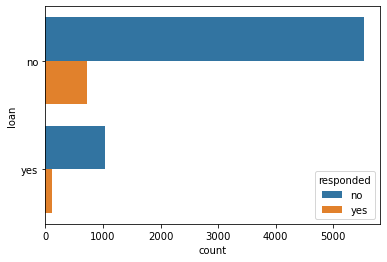

In [ ]:
sns.countplot(y=data.loan,hue=data.responded)

### customers who did not have loan responded to the campaign more than that of customers who had loan

<AxesSubplot:xlabel='count', ylabel='poutcome'>

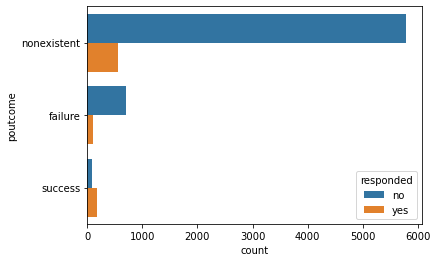

In [ ]:
# try other categoral columns wrt target
#sns.countplot(y=data.day_of_week,hue=data.responded)
#sns.countplot(y=data.quarter,hue=data.responded)
#sns.countplot(y=data.profession,hue=data.responded)
#sns.countplot(y=data.schooling,hue=data.responded)
#sns.countplot(y=data.contact,hue=data.responded)
sns.countplot(y=data.poutcome,hue=data.responded)

### Conclusion of Bi-variate analysis
### We can say that there is a better response when contacted on:
    - Monday
    - During Q1 of the financial year
    - When people are married
    - When they dont have a loan
    - when they are working professional
    - Education is University degree
    - Contacted through mobile
    - They are new customers - previous outcome was non-existant

### Calculate the correlation for the numeric variable

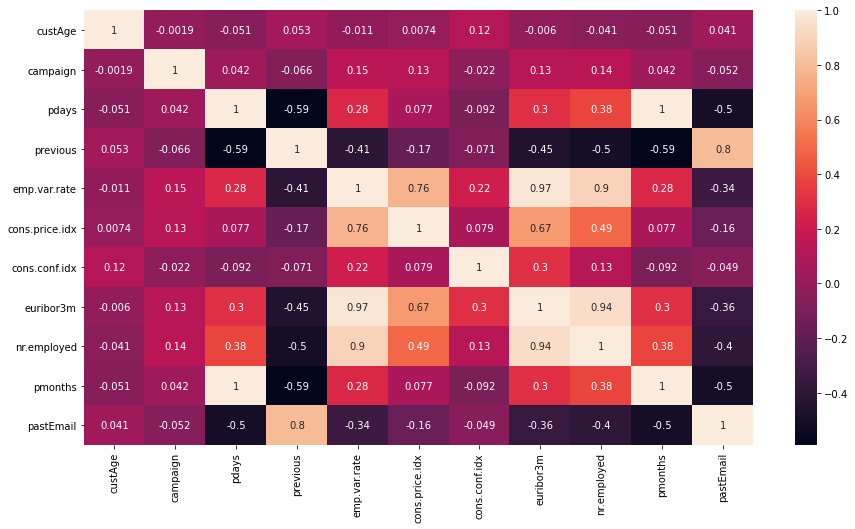

In [ ]:
#Calculate the correlation for the dataset
corr = data.corr()

#Setting the size of the figure
plt.figure(figsize =(15,8))

#Plot the correlation using heatmap
ax = sns.heatmap(corr, annot=True)

Drop columns which are highly corelated

In [ ]:
data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pmonths', 'pastEmail', 'responded',
       'quarter'],
      dtype='object')

### Encoding the Categoral variables

In [ ]:
columns_to_oe = ["profession","marital","schooling","contact","quarter","day_of_week","poutcome",
                "responded"]

In [ ]:
for i in columns_to_oe:
    print(i,end=': \n')
    print(data[i].value_counts())
    print()

profession: 
working        6787
non-working     626
Name: profession, dtype: int64

marital: 
married     4452
single      2118
divorced     843
Name: marital, dtype: int64

schooling: 
university.degree      3940
basic.school           1593
high.school            1216
professional.course     664
Name: schooling, dtype: int64

contact: 
cellular     4730
telephone    2683
Name: contact, dtype: int64

quarter: 
Q1    3955
Q2    2453
Q3     912
Q4      93
Name: quarter, dtype: int64

day_of_week: 
mon    2152
thu    1378
tue    1341
wed    1295
fri    1247
Name: day_of_week, dtype: int64

poutcome: 
nonexistent    6350
failure         799
success         264
Name: poutcome, dtype: int64

responded: 
no     6573
yes     840
Name: responded, dtype: int64



In [ ]:
from category_encoders import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(cols = columns_to_oe,mapping=[
        {'col': 'profession', 'mapping': {'non-working': 0, 'working': 1}},
        {'col':'marital','mapping':{'single':0,'married':1,'divorced':2}},
        {'col':'schooling','mapping':{'basic.school':0,'high.school':1,'university.degree':2,'professional.course':3}},
        {'col': 'contact', 'mapping': {'telephone': 0, 'cellular': 1}},
        {'col':'quarter','mapping':{'Q1':0,'Q2':1,'Q3':2,'Q4':3}},
        {'col':'day_of_week','mapping':{'mon':0,'tue':1,'wed':2,'thu':3,'fri':4}},
        {'col':'poutcome','mapping':{'nonexistent':0,'failure':1,'success':2}},
        {'col':'responded','mapping':{'no':0,'yes':1}}])

In [ ]:
data_copy = oe.fit_transform(data)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
for i in columns_to_oe:
    print(i,end=': \n')
    print(data_copy[i].value_counts())
    print()

profession: 
1    6787
0     626
Name: profession, dtype: int64

marital: 
1    4452
0    2118
2     843
Name: marital, dtype: int64

schooling: 
2    3940
0    1593
1    1216
3     664
Name: schooling, dtype: int64

contact: 
1    4730
0    2683
Name: contact, dtype: int64

quarter: 
0    3955
1    2453
2     912
3      93
Name: quarter, dtype: int64

day_of_week: 
0    2152
3    1378
1    1341
2    1295
4    1247
Name: day_of_week, dtype: int64

poutcome: 
0    6350
1     799
2     264
Name: poutcome, dtype: int64

responded: 
0    6573
1     840
Name: responded, dtype: int64



In [ ]:
# Ordinal Columns can as well be Label Encoding
#columns_to_le = ["profession","marital","schooling","contact","quarter","day_of_week","poutcome","responded"]


In [ ]:
#Label Encoding the categorical columns
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#for col in columns_to_le:
#   data[col] = le.fit_transform(data[col])

In [ ]:
# !pip install category_encoders
#!pip install statsmodels==0.10.0rc2 --pre --user

In [ ]:
columns_to_ohe = ["default","housing","loan"]
#One hot Encoding the Nominal categorical columns
from category_encoders import OneHotEncoder
oe = OneHotEncoder(cols = columns_to_ohe)
data_copy = oe.fit_transform(data_copy)

In [ ]:
data_copy.shape

(7413, 25)

In [ ]:
data_copy.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default_1',
       'default_2', 'housing_1', 'housing_2', 'loan_1', 'loan_2', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'pmonths', 'pastEmail', 'responded', 'quarter'],
      dtype='object')

In [ ]:
data_copy.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,quarter
0,55.0,1,0,2,1,0,1,0,1,0,...,0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0,2
1,38.0,1,1,2,1,0,1,0,1,0,...,0,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0,1
2,42.0,1,1,1,1,0,1,0,1,0,...,0,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0,0
3,55.0,1,2,2,1,0,0,1,0,1,...,0,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0,1
4,38.0,1,2,2,1,0,0,1,1,0,...,1,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0,0


In [ ]:
#Splitting X and y
X= data_copy.drop("responded",axis=1)
y = data_copy["responded"]

In [ ]:
data.shape

(7413, 22)

### Feature Scaling

In [ ]:
#Save numerical columns in a list
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pmonths","pastEmail"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[[col]])

In [ ]:
X.shape

(7413, 24)

In [ ]:
X.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,quarter
0,1.675436,1,0,2,1,0,1,0,1,0,...,-0.356116,0,-0.096985,-0.641086,-0.309451,0.348410,0.418285,0.202137,-0.286631,2
1,-0.164693,1,1,2,1,0,1,0,1,0,...,-0.356116,0,0.859405,0.600423,-0.459996,0.789135,0.860098,0.202137,-0.286631,1
2,0.268278,1,1,1,1,0,1,0,1,0,...,-0.356116,0,0.668127,0.731836,0.894909,0.730104,0.352628,0.202137,-0.286631,0
3,1.675436,1,2,2,1,0,0,1,0,1,...,-0.356116,0,0.859405,0.600423,-0.459996,0.790281,0.860098,0.202137,-0.286631,1
4,-0.164693,1,2,2,1,0,0,1,1,0,...,1.579288,1,-1.180893,-1.171926,-1.212722,-1.313619,-0.904420,0.202137,0.506204,0
